In [1]:
"""Plots for the method paper
Network_Inference_AUPR_comparisson_for_FB_vs_KNN
"""

'Plots for the method paper\nNetwork_Inference_AUPR_comparisson_for_FB_vs_KNN\n'

In [2]:
import os
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

# Configure some Matplotlib settings.
fontSize = 20
matplotlib.rcParams.update({
    "axes.formatter.limits": (-4,4),
    "svg.fonttype" : "none",
    "pdf.fonttype": 42,
    "font.family": "sans-serif",
    "font.sans-serif": "DejaVu Sans",  # Changed from "Helvetica" to "DejaVu Sans"
    "font.size": fontSize,
    "axes.titlesize": fontSize,
    "xtick.labelsize": fontSize,
    "ytick.labelsize": fontSize,
    # 'text.usetex':True, 'text.latex.preamble':[r'\usepackage{sansmath}', r'\sansmath']
})
plotStyles = {"markersize":8, "markeredgewidth":1.0, "linewidth":3.0}
stepStyles = {"markersize":20, "markeredgewidth":3.0, "linewidth":3.0, "where":"post"}
barStyles = {"width":0.65, "linewidth":0, "align":"center"}

In [3]:
path_to_figures = os.path.expanduser('./')

In [4]:
### Load data into a data frame so it is easier to group according to specific criteria
path_to_data = os.path.expanduser('../DATA/dream3/')
os.chdir(path_to_data)

inFiles = []
column_names = ['AUPR', 'Network Size', 'Network Name', 'Data Type', 'MI-est', 'Bins {k}', 'Inf-algo', 'Replicate']

# listing all in silico networks
topology_list = []

for topology in os.listdir():
    if os.path.isdir(topology) == True:
        topology_list.append(topology)

### Main part - iterating over all networks and all replicates
for topology in topology_list:   
    os.chdir(f"./{topology}")
    
    for replicate in os.listdir():
    
        if os.path.isdir(replicate) == True:
            os.chdir(f"./{replicate}")

            for file in os.listdir():
                if "AUPR" in file:
                    inFiles.append(os.path.abspath(file))

            os.chdir('../')  
    os.chdir('../')  
    
df_from_each_file = (pd.read_csv(f, comment='#', names=column_names) for f in inFiles)
df = pd.concat(df_from_each_file, ignore_index=True)

df["Organism"] = df["Network Name"].str.slice(0, -1)  # for DREAM 3 only
#df.replace({'Inf-algo' : { 'MI2_Zscore' : 'CLR_v1', 'MI2' : 'RL', 'CMIA_CLR' : 'CMIA_CLR'}}, inplace=True)
df.replace({'Inf-algo' : { 'MI2_Zscore' : 'CLR_v1', 'MI2' : 'RL', 'CMIA_CLR' : 'CMIA', 'CLRvMinet' : 'CLRvMinet'}}, inplace=True)
df.replace({'MI-est' : { 'Shannon' : 'ML', 'Miller-Madow' : 'MM'}}, inplace=True) 

# removing duplicates
df.drop_duplicates(inplace = True)

print(df.head(5))

    AUPR  Network Size Network Name Data Type MI-est  Bins {k}  \
0  0.201            50       Ecoli1        SS    KSG         3   
1  0.216            50       Ecoli1        SS    KSG         3   
2  0.216            50       Ecoli1        SS    KSG         3   
3  0.169            50       Ecoli1        SS     MM        13   
4  0.065            50       Ecoli1        SS     ML        13   

           Inf-algo Replicate Organism  
0  CLRvMinet_pandas     rep_1    Ecoli  
1     CMIA_CLR_vKSG     rep_1    Ecoli  
2                RL     rep_1    Ecoli  
3                RL     rep_1    Ecoli  
4            ARACNE     rep_1    Ecoli  


In [5]:
df.groupby(["Network Size", "Inf-algo", "MI-est"]).count()

AUPR  Network Name  Data Type  Bins {k}  \
Network Size Inf-algo         MI-est                                            
50           ARACNE           ML        50            50         50        50   
             CLRvMinet_pandas KSG       50            50         50        50   
                              ML        50            50         50        50   
             CMIA_CLR_vKSG    KSG       50            50         50        50   
             RL               KSG       50            50         50        50   
                              ML        50            50         50        50   
                              MM        50            50         50        50   

                                      Replicate  Organism  
Network Size Inf-algo         MI-est                       
50           ARACNE           ML             50        50  
             CLRvMinet_pandas KSG            50        50  
                              ML             50        50  
             CMIA_CLR_vKSG    KSG            50        50  
             RL               KSG            50        50  
                              ML             50        50  
                              MM             50        50

'\nplt.figtext(0.05,0.9,"A", {\'ha\':\'left\',\'va\':\'top\',\'fontsize\':20, \'fontweight\':\'bold\'})\nplt.figtext(0.5,0.9,"B", {\'ha\':\'left\',\'va\':\'top\',\'fontsize\':20, \'fontweight\':\'bold\'})\nplt.figtext(0.05,0.635,"C", {\'ha\':\'left\',\'va\':\'top\',\'fontsize\':20, \'fontweight\':\'bold\'})\nplt.figtext(0.5,0.635,"D", {\'ha\':\'left\',\'va\':\'top\',\'fontsize\':20, \'fontweight\':\'bold\'})\nplt.figtext(0.05,0.365,"E", {\'ha\':\'left\',\'va\':\'top\',\'fontsize\':20, \'fontweight\':\'bold\'})\n'

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


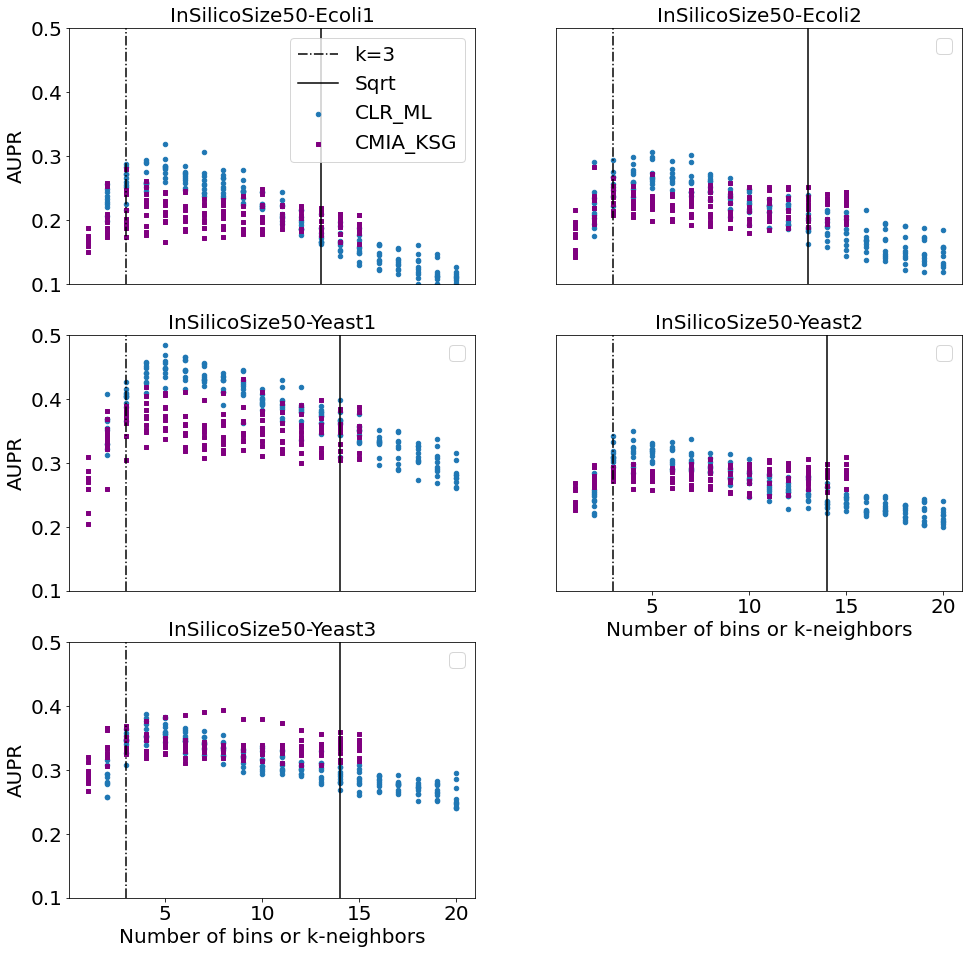

In [6]:
# Plot by network size == 50
matplotlib.rcParams.update({"figure.figsize": (16, 16)})

# Constants
#MI_list = ["ML", "KSG"]
#Inference_list = ["CLR_v1", "CLRvMinet", "CMIA_CLR", "CMIA_CLR_vKSG"]
AUPR_min = 0.1
Ecoli1_g50_data_pts = 170
Ecoli2_g50_data_pts = 169
Yeast1_g50_data_pts = 201
Yeast2_g50_data_pts = 201
Yeast3_g50_data_pts = 201

ax1 = plt.subplot(3,2,1)
# Removing some MI estimators and Inference-algo
#rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Ecoli1") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Ecoli1") & (df["MI-est"] == "ML") & (df["Inf-algo"] == "CLRvMinet")]  
rslt_df.plot.scatter(x = "Bins {k}", y = "AUPR", label="CLR_ML", ax=ax1)#, rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)
#rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Ecoli1") & (df["MI-est"] == "KSG") & (df["Inf-algo"] == "CLRvMinet")]  
#rslt_df.plot.scatter(x = "Bins {k}", y = "AUPR", c='DarkGreen', marker = "x",label = "CLR_KSG", ax=ax1)#, rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)
rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Ecoli1") & (df["MI-est"] == "KSG") & (df["Inf-algo"] == "CMIA_CLR_vKSG")]  
rslt_df.plot.scatter(x = "Bins {k}", y = "AUPR", c='Purple', marker = "s",label = "CMIA_KSG", ax=ax1)#, rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)

ax1.set_ylim(AUPR_min, 0.5); ax1.set_ylabel('AUPR')
ax1.set_xticks([]); ax1.set_xlabel('')
ax1.axvline(x=3, color='k', linestyle='dashdot',label='k=3')
ax1.axvline(x=np.floor(Ecoli1_g50_data_pts**(1/2)), color='k', label='Sqrt')
ax1.set_title("InSilicoSize50-Ecoli1")
ax1.legend()

ax2 = plt.subplot(3,2,2)
# Removing some MI estimators and Inference-algo
#rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Ecoli2") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Ecoli2") & (df["MI-est"] == "ML") & (df["Inf-algo"]== "CLRvMinet")]  
rslt_df.plot.scatter(x = "Bins {k}", y = "AUPR", label="CLR_ML", ax=ax2)#, rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)
#rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Ecoli2") & (df["MI-est"] == "KSG") & (df["Inf-algo"]== "CLRvMinet")]  
#rslt_df.plot.scatter(x = "Bins {k}", y = "AUPR", c='DarkGreen', marker = "x",label = "CLR_KSG", ax=ax2)#, rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)
rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Ecoli2") & (df["MI-est"] == "KSG") & (df["Inf-algo"] == "CMIA_CLR_vKSG")]  
rslt_df.plot.scatter(x = "Bins {k}", y = "AUPR", c='Purple', marker = "s",label = "CMIA_KSG", ax=ax2)#, rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)

ax2.set_ylim(AUPR_min, 0.5); ax2.set_ylabel(''); ax2.set_yticks([])
ax2.set_xticks([]); ax2.set_xlabel('')
ax2.axvline(x=3, color='k', linestyle='dashdot',label='k=3')
ax2.axvline(x=np.floor(Ecoli2_g50_data_pts**(1/2)), color='k', label='Sqrt')
ax2.set_title("InSilicoSize50-Ecoli2")
ax2.legend('')

ax3 = plt.subplot(3,2,3)
# Removing some MI estimators and Inference-algo
#rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Yeast1") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Yeast1") & (df["MI-est"] == "ML") & (df["Inf-algo"]== "CLRvMinet")]  
rslt_df.plot.scatter(x = "Bins {k}", y = "AUPR", label="CLR_ML", ax=ax3)#, rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)
#rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Yeast1") & (df["MI-est"] == "KSG") & (df["Inf-algo"]== "CLRvMinet")]  
#rslt_df.plot.scatter(x = "Bins {k}", y = "AUPR", c='DarkGreen', marker = "x",label = "CLR_KSG", ax=ax3)#, rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)
rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Yeast1") & (df["MI-est"] == "KSG") & (df["Inf-algo"] == "CMIA_CLR_vKSG")]  
rslt_df.plot.scatter(x = "Bins {k}", y = "AUPR", c='Purple', marker = "s",label = "CMIA_KSG", ax=ax3)#, rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)

ax3.set_ylim(AUPR_min, 0.5); ax3.set_ylabel('AUPR')
ax3.set_xticks([]); ax3.set_xlabel('')
ax3.axvline(x=3, color='k', linestyle='dashdot',label='k=3')
ax3.axvline(x=np.floor(Yeast1_g50_data_pts**(1/2)), color='k', label='Sqrt')
ax3.set_title("InSilicoSize50-Yeast1")
ax3.legend('')

ax4 = plt.subplot(3,2,4)
# Removing some MI estimators and Inference-algo
#rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Yeast2") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Yeast2") & (df["MI-est"] == "ML") & (df["Inf-algo"]== "CLRvMinet")]  
rslt_df.plot.scatter(x = "Bins {k}", y = "AUPR", label="CLR_ML", ax=ax4)#, rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)
#rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Yeast2") & (df["MI-est"] == "KSG") & (df["Inf-algo"]== "CLRvMinet")]  
#rslt_df.plot.scatter(x = "Bins {k}", y = "AUPR", c='DarkGreen', marker = "x",label = "CLR_KSG", ax=ax4)#, rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)
rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Yeast2") & (df["MI-est"] == "KSG") & (df["Inf-algo"] == "CMIA_CLR_vKSG")]  
rslt_df.plot.scatter(x = "Bins {k}", y = "AUPR", c='Purple', marker = "s",label = "CMIA_KSG", ax=ax4)#, rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)

ax4.set_ylim(AUPR_min, 0.5); ax4.set_ylabel(''); ax4.set_yticks([])
ax4.axvline(x=3, color='k', linestyle='dashdot',label='k=3')
ax4.axvline(x=np.floor(Yeast2_g50_data_pts**(1/2)), color='k', label='Sqrt')
ax4.set_title("InSilicoSize50-Yeast2")
ax4.set_xlabel("Number of bins or k-neighbors")
ax4.legend('')

ax5 = plt.subplot(3,2,5)
# Removing some MI estimators and Inference-algo
#rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Yeast3") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Yeast3") & (df["MI-est"] == "ML") & (df["Inf-algo"]== "CLRvMinet")]  
rslt_df.plot.scatter(x = "Bins {k}", y = "AUPR", label="CLR_ML", ax=ax5)#, rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)
#rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Yeast3") & (df["MI-est"] == "KSG") & (df["Inf-algo"]== "CLRvMinet")]  
#rslt_df.plot.scatter(x = "Bins {k}", y = "AUPR", c='DarkGreen', marker = "x",label = "CLR_KSG", ax=ax5)#, rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)
rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Yeast3") & (df["MI-est"] == "KSG") & (df["Inf-algo"] == "CMIA_CLR_vKSG")]  
rslt_df.plot.scatter(x = "Bins {k}", y = "AUPR", c='Purple', marker = "s",label = "CMIA_KSG", ax=ax5)#, rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)

ax5.set_ylim(AUPR_min, 0.5); ax5.set_ylabel('AUPR')
ax5.axvline(x=3, color='k', linestyle='dashdot',label='k=3')
ax5.axvline(x=np.floor(Yeast3_g50_data_pts**(1/2)), color='k', label='Sqrt')
ax5.set_title("InSilicoSize50-Yeast3")
ax5.set_xlabel("Number of bins or k-neighbors")
ax5.legend('')

plt.suptitle('')

plt.tight_layout

"""
plt.figtext(0.05,0.9,"A", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.5,0.9,"B", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.05,0.635,"C", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.5,0.635,"D", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.05,0.365,"E", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
"""
# plt.savefig(os.path.join(path_to_figures, 'FigureS10_AUPR_vs_bins_and_kNN.pdf'), dpi=300, bbox_inches='tight')

In [7]:
"""
### Plot by network size of kNN = 3  and bins = sqrt
matplotlib.rcParams.update({"figure.figsize": (10,10)})

Ecoli1_g100_data_pts = 341
Ecoli2_g100_data_pts = 322
Yeast1_g100_data_pts = 401
Yeast2_g100_data_pts = 401
Yeast3_g100_data_pts = 401

# backing up df
df_backup = df.copy()
# Selecting k =3 and bins = floor(sqrt(data)) same as Minet
df = df[~((df['Bins {k}'] != 3) & (df["MI-est"] == "KSG"))]  
df = df[~((df['Network Size']==50) & (df["MI-est"] == "ML") & (df["Network Name"] == "Ecoli1") & (df['Bins {k}'] != np.floor(Ecoli1_g50_data_pts**(1/2))))]  
df = df[~((df['Network Size']==50) & (df["MI-est"] == "ML") & (df["Network Name"] == "Ecoli2") & (df['Bins {k}'] != np.floor(Ecoli2_g50_data_pts**(1/2))))]
df = df[~((df['Network Size']==50) & (df["MI-est"] == "ML") & (df["Network Name"].str.contains("Yeast")) & (df['Bins {k}'] != np.floor(Yeast1_g50_data_pts**(1/2))))]
df = df[~((df['Network Size']==100) & (df["MI-est"] == "ML") & (df["Network Name"] == "Ecoli1") & (df['Bins {k}'] != np.floor(Ecoli1_g100_data_pts**(1/2))))]  
df = df[~((df['Network Size']==100) & (df["MI-est"] == "ML") & (df["Network Name"] == "Ecoli2") & (df['Bins {k}'] != np.floor(Ecoli2_g100_data_pts**(1/2))))]
df = df[~((df['Network Size']==100) & (df["MI-est"] == "ML") & (df["Network Name"].str.contains("Yeast")) & (df['Bins {k}'] != np.floor(Yeast1_g100_data_pts**(1/2))-1))]
df = df[~(df['Network Size']== 10)] # For DREAM3 no need for network size 10

MI_list = ["ML","KSG"]
#df.replace({'Inf-algo' : { 'CMIA_CLR_vKSG' : 'CMIAvK', 'CLRvMinet' : 'CLRvM'}}, inplace=True)
#Inference_list = ["CLR_v1","CLRvM","CMIA_CLR","CMIAvK"]
df.replace({'Inf-algo' : { 'CMIA_CLR_vKSG' : 'CMIA', 'CLRvMinet' : 'CLR'}}, inplace=True)
Inference_list = ["CLR","CMIA"]

# restoring DF to origianl
#df = df_backup.copy()
"""

'\n### Plot by network size of kNN = 3  and bins = sqrt\nmatplotlib.rcParams.update({"figure.figsize": (10,10)})\n\nEcoli1_g100_data_pts = 341\nEcoli2_g100_data_pts = 322\nYeast1_g100_data_pts = 401\nYeast2_g100_data_pts = 401\nYeast3_g100_data_pts = 401\n\n# backing up df\ndf_backup = df.copy()\n# Selecting k =3 and bins = floor(sqrt(data)) same as Minet\ndf = df[~((df[\'Bins {k}\'] != 3) & (df["MI-est"] == "KSG"))]  \ndf = df[~((df[\'Network Size\']==50) & (df["MI-est"] == "ML") & (df["Network Name"] == "Ecoli1") & (df[\'Bins {k}\'] != np.floor(Ecoli1_g50_data_pts**(1/2))))]  \ndf = df[~((df[\'Network Size\']==50) & (df["MI-est"] == "ML") & (df["Network Name"] == "Ecoli2") & (df[\'Bins {k}\'] != np.floor(Ecoli2_g50_data_pts**(1/2))))]\ndf = df[~((df[\'Network Size\']==50) & (df["MI-est"] == "ML") & (df["Network Name"].str.contains("Yeast")) & (df[\'Bins {k}\'] != np.floor(Yeast1_g50_data_pts**(1/2))))]\ndf = df[~((df[\'Network Size\']==100) & (df["MI-est"] == "ML") & (df["Network Nam

In [8]:
# Plot by network size of kNN = 3  and bins = sqrt
matplotlib.rcParams.update({"figure.figsize": (10,10)})

Ecoli1_g100_data_pts = 341
Ecoli2_g100_data_pts = 322
Yeast1_g100_data_pts = 401
Yeast2_g100_data_pts = 401
Yeast3_g100_data_pts = 401

# backing up df
df_backup = df.copy()
# Selecting k =3 and bins = floor(sqrt(data)) same as Minet
df = df[~((df['Bins {k}'] != 3) & (df["MI-est"] == "KSG"))]  
df = df[~((df['Network Size']==50) & ((df["MI-est"] == "ML") | (df["MI-est"] == "MM")) & (df["Network Name"] == "Ecoli1") & (df['Bins {k}'] != np.floor(Ecoli1_g50_data_pts**(1/2))))]  
df = df[~((df['Network Size']==50) & ((df["MI-est"] == "ML") | (df["MI-est"] == "MM")) & (df["Network Name"] == "Ecoli2") & (df['Bins {k}'] != np.floor(Ecoli2_g50_data_pts**(1/2))))]
df = df[~((df['Network Size']==50) & ((df["MI-est"] == "ML") | (df["MI-est"] == "MM")) & (df["Network Name"].str.contains("Yeast")) & (df['Bins {k}'] != np.floor(Yeast1_g50_data_pts**(1/2))))]
df = df[~((df['Network Size']==100) & ((df["MI-est"] == "ML") | (df["MI-est"] == "MM")) & (df["Network Name"] == "Ecoli1") & (df['Bins {k}'] != np.floor(Ecoli1_g100_data_pts**(1/2))))]  
df = df[~((df['Network Size']==100) & ((df["MI-est"] == "ML") | (df["MI-est"] == "MM")) & (df["Network Name"] == "Ecoli2") & (df['Bins {k}'] != np.floor(Ecoli2_g100_data_pts**(1/2))))]
df = df[~((df['Network Size']==100) & ((df["MI-est"] == "ML") | (df["MI-est"] == "MM")) & (df["Network Name"].str.contains("Yeast")) & (df['Bins {k}'] != np.floor(Yeast1_g100_data_pts**(1/2))))]
df = df[~(df['Network Size']== 10)] # For DREAM3 no need for network size 10

MI_list = ["ML","KSG"]
#df.replace({'Inf-algo' : { 'CMIA_CLR_vKSG' : 'CMIAvK', 'CLRvMinet' : 'CLRvM'}}, inplace=True)
#Inference_list = ["CLR_v1","CLRvM","CMIA_CLR","CMIAvK"]
df.replace({'Inf-algo' : { 'CMIA_CLR_vKSG' : 'CMIA', 'CLRvMinet' : 'CLR'}}, inplace=True)
Inference_list = ["CLR","CMIA"]

# restoring DF to origianl
#df = df_backup.copy()

In [9]:
df.groupby(["Network Size", "Inf-algo", "MI-est"]).count()

AUPR  Network Name  Data Type  Bins {k}  \
Network Size Inf-algo       MI-est                                            
50           ARACNE         KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
             CLR            KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
             CMIA           KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
             CMI_CMI_pandas KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
             RL             KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
             SA_CLR_v2      KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
100          ARACNE         KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
             CLR            KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
             CMIA           KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
             CMI_CMI_pandas KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
             RL             KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
             SA_CLR_v2      KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   

                                    Replicate  Organism  
Network Size Inf-algo      

In [10]:
### 2021-04-27: Adding AUPR improvement relative to [CLR, ML]
#df["AUPR_relative"] = df["AUPR"]-df["AUPR"][]
#df[(df["Inf-algo"] == "CLR") & (df["MI-est"] == "ML") & (df["Network Size"] == 50) & (df["Network Name"] == "Yeast2")]

for net_name in df["Network Name"].unique():
    print(net_name)
    #rslt_df = df[df["Network Name"] == net_name]
    #for net_size in rslt_df["Network Size"].unique():
    for net_size in df["Network Size"].unique():
        print(net_size)
        #rslt_df = rslt_df[rslt_df["Network Size"] == net_size]
        #for rep in rslt_df.Replicate.unique():
        for rep in df.Replicate.unique():
            print(rep)
            #rslt_df = rslt_df[rslt_df["Replicate"] == rep]
            rslt_df = df[(df["Replicate"] == rep) & (df["Network Size"] == net_size) & (df["Network Name"] == net_name)]
            #print(df[(df["Inf-algo"] == "CLR") & (df["MI-est"] == "ML") & (df["Replicate"] == rep) & (df["Network Size"] == net_size) & (df["Network Name"] == net_name)].AUPR)
            #print(rslt_df.AUPR - rslt_df[(rslt_df["Inf-algo"] == "CLR") & (rslt_df["MI-est"] == "ML")].AUPR)
            #AUPR_value_to_compare = float(rslt_df[(rslt_df["Inf-algo"] == "CLRvMinet") & (rslt_df["MI-est"] == "ML")].AUPR)
            AUPR_value_to_compare = float(rslt_df[(rslt_df["Inf-algo"] == "CLR") & (rslt_df["MI-est"] == "ML")].AUPR)
            print((rslt_df.AUPR - AUPR_value_to_compare)/AUPR_value_to_compare*100)
            df.loc[rslt_df.index, ('AUPR_relative')] = (rslt_df.AUPR - AUPR_value_to_compare)/AUPR_value_to_compare*100

df['AUPR_relative'] = df['AUPR_relative'].fillna(0)

Yeast3
100
rep_8
15   -52.314815
16   -69.907407
29    23.148148
32   -13.888889
33   -54.629630
41    16.203704
44   -25.000000
45   -95.833333
46   -88.888889
47   -12.037037
66     6.018519
67   -56.481481
68   -92.592593
69   -79.629630
70   -50.462963
71   -25.000000
72    20.370370
91     0.000000
92   -93.981481
93     1.388889
94    -9.722222
95   -93.981481
96   -25.462963
97   -79.166667
Name: AUPR, dtype: float64
rep_4
98    -50.480769
99    -67.307692
112    23.076923
115   -11.057692
116   -50.480769
124    16.826923
127   -28.846154
128   -96.634615
129   -89.423077
130   -15.384615
149     8.653846
150   -54.326923
151   -94.230769
152   -73.076923
153   -50.000000
154   -23.557692
155    20.192308
174     0.000000
175   -91.346154
176     5.769231
177   -12.980769
178   -92.307692
179   -28.365385
180   -80.769231
Name: AUPR, dtype: float64
rep_1
181   -48.792271
182   -68.599034
195    20.289855
198    -8.695652
199   -56.038647
207    15.942029
210   -27.053140
211   

rep_10
2717   -63.513514
2718   -99.549550
2719   -57.657658
2720   -72.522523
2721   -27.027027
2722   -86.936937
2723     3.153153
2724   -89.189189
2732    24.774775
2735   -64.414414
2736   -27.927928
2737   -73.423423
2738    20.270270
2739   -59.459459
2740   -87.837838
2741   -65.765766
2742   -43.693694
2743   -71.621622
2744   -94.144144
2745    36.936937
2746   -33.783784
2777    39.189189
2798     0.000000
2799   -75.675676
Name: AUPR, dtype: float64
rep_9
2800   -71.673820
2801   -99.141631
2802   -54.077253
2803   -67.381974
2804   -33.905579
2805   -86.266094
2806     1.287554
2807   -87.982833
2815    17.167382
2818   -57.510730
2819   -30.901288
2820   -74.248927
2821    17.596567
2822   -60.515021
2823   -86.266094
2824   -73.390558
2825   -37.768240
2826   -72.532189
2827   -99.141631
2828    37.339056
2829   -41.630901
2860    36.909871
2881     0.000000
2882   -72.532189
Name: AUPR, dtype: float64
rep_6
2883   -69.264069
2884   -99.567100
2885   -58.441558
2886   -7

rep_2
9381   -86.549708
9389   -26.315789
9401   -96.491228
9414    13.450292
9417   -95.906433
9418   -56.140351
9419    15.789474
9420   -67.836257
9428    16.959064
9440   -63.157895
9441   -61.403509
9449    -8.771930
9471   -57.309942
9472   -33.918129
9473    12.865497
9481     5.847953
9484   -56.725146
9496     0.000000
9504   -43.274854
9505   -87.719298
9506   -83.040936
9507   -21.052632
9508    -2.923977
9509   -40.935673
Name: AUPR, dtype: float64
rep_5
9510   -94.578313
9518   -31.325301
9530   -96.987952
9543    21.084337
9546   -96.385542
9547   -54.819277
9548    10.843373
9549   -67.469880
9557    18.072289
9569   -65.662651
9570   -66.867470
9578   -18.072289
9600   -78.313253
9601   -40.963855
9602    31.927711
9610     4.819277
9613   -65.662651
9625     0.000000
9633   -46.385542
9634   -78.313253
9635   -98.795181
9636   -24.096386
9637    -5.421687
9638   -43.975904
Name: AUPR, dtype: float64
rep_10
9639   -97.546012
9647   -26.993865
9659   -96.319018
9672    1

In [11]:
df.groupby(["Network Size", "Inf-algo", "MI-est"]).median()

AUPR  AUPR_relative
Network Size Inf-algo       MI-est                       
50           ARACNE         KL      0.0125     -95.678245
                            KSG     0.1355     -46.555091
                            ML      0.0680     -72.854758
                            MM      0.0880     -63.992322
             CLR            KL      0.0925     -64.373121
                            KSG     0.2635       7.698352
                            ML      0.2390       0.000000
                            MM      0.2530       7.384590
             CMIA           KL      0.0925     -62.825397
                            KSG     0.2855      16.044745
                            ML      0.2205     -17.460275
                            MM      0.2250     -10.261187
             CMI_CMI_pandas KL      0.0080     -97.117940
                            KSG     0.0675     -72.623695
                            ML      0.0100     -96.163228
                            MM      0.0130     -95.014395
             RL             KL      0.0210     -93.673922
                            KSG     0.2460      -1.980646
                            ML      0.2060     -23.523603
                            MM      0.2315     -10.713657
             SA_CLR_v2      KL      0.0840     -64.952537
                            KSG     0.2900      15.928680
                            ML      0.1880     -36.761053
                            MM      0.1890     -33.558559
100          ARACNE         KL      0.0180     -89.370714
                            KSG     0.1030     -50.480769
                            ML      0.0515     -75.236715
                            MM      0.0680     -64.527690
             CLR            KL      0.0625     -71.640212
                            KSG     0.2460      10.391763
                            ML      0.2150       0.000000
                            MM      0.2305      17.280426
             CMIA           KL      0.0735     -66.542289
                            KSG     0.2610      22.611618
                            ML      0.1420     -35.252693
                            MM      0.1570     -28.752859
             CMI_CMI_pandas KL      0.0140     -93.977542
                            KSG     0.0505     -76.009930
                            ML      0.0020     -99.150647
                            MM      0.0040     -97.933475
             RL             KL      0.0305     -84.624854
                            KSG     0.2200       0.643777
                            ML      0.1050     -46.763277
                            MM      0.1380     -29.130225
             SA_CLR_v2      KL      0.0700     -66.241118
                            KSG     0.2585      20.128001
                            ML      0.0730     -57.021110
                            MM      0.0770     -56.522673

'\nplt.figtext(0.05,0.9,"A", {\'ha\':\'left\',\'va\':\'top\',\'fontsize\':20, \'fontweight\':\'bold\'})\nplt.figtext(0.5,0.9,"B", {\'ha\':\'left\',\'va\':\'top\',\'fontsize\':20, \'fontweight\':\'bold\'})\nplt.figtext(0.05,0.635,"C", {\'ha\':\'left\',\'va\':\'top\',\'fontsize\':20, \'fontweight\':\'bold\'})\nplt.figtext(0.5,0.635,"D", {\'ha\':\'left\',\'va\':\'top\',\'fontsize\':20, \'fontweight\':\'bold\'})\nplt.figtext(0.05,0.365,"E", {\'ha\':\'left\',\'va\':\'top\',\'fontsize\':20, \'fontweight\':\'bold\'})\nplt.figtext(0.05,0.365,"E", {\'ha\':\'left\',\'va\':\'top\',\'fontsize\':20, \'fontweight\':\'bold\'})\n'

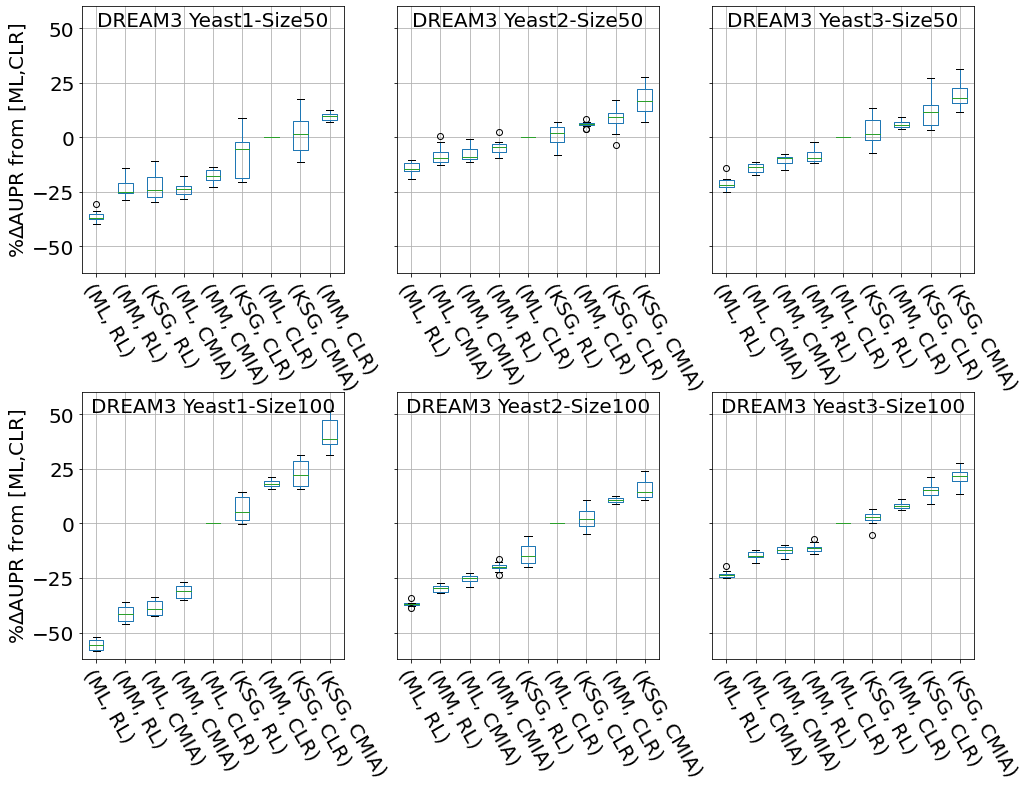

In [12]:
### 2021-10-02: Plotting the 6 Yeast networks
### 2021-12-08: Plotting the 6 Yeast networks - shiftting x-axis slightly to the left

# Removing some MI estimators and Inference-algo
MI_list = ["ML", "MM", "KSG"]
Inference_list = ["RL", "CLR", "CMIA"]

### Plotting all 4 subplots in one figure
matplotlib.rcParams.update({"figure.figsize": (16,12)})

# Contants
label_rotation = -60 #-35
title_pad = -20
y_lim_high = 60 #95 #80
y_lim_low = -62 #-60

ax1 = plt.subplot(2,3,1)

rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Yeast1") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()

ax1.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax1.set_ylim(y_lim_low, y_lim_high); 
#ax1.set_xticks([]); ax1.set_xlabel('')
ax1.set_title("DREAM3 Yeast1-Size50", y=1.0, pad=title_pad)
#ax1.tick_params(axis='x',labelrotation=label_rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

ax2 = plt.subplot(2,3,2)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Yeast2") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()
#rslt_df.boxplot(column=["AUPR"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax2.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax2.set_ylim(y_lim_low, y_lim_high); 
ax2.set_ylabel(''); ax2.set_yticklabels([]); #ax2.set_yticks([]);
ax2.set_title("DREAM3 Yeast2-Size50", y=1.0, pad=title_pad)
#ax2.tick_params(axis='x',labelrotation=label_rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax2.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

ax3 = plt.subplot(2,3,3)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Yeast3") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()
#rslt_df.boxplot(column=["AUPR"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax3.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax3.set_ylim(y_lim_low, y_lim_high); 
ax3.set_ylabel(''); ax3.set_yticklabels([]); #ax2.set_yticks([]);
ax3.set_title("DREAM3 Yeast3-Size50", y=1.0, pad=title_pad)
#ax3.tick_params(axis='x',labelrotation=label_rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax3.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

###################

ax4 = plt.subplot(2,3,4)

rslt_df = df[(df['Network Size']==100) & (df['Network Name']=="Yeast1") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()

ax4.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax4.set_ylim(y_lim_low, y_lim_high); 
#ax4.set_yticks([]); ax4.set_ylabel('')
#ax4.set_xticks([]); ax4.set_xlabel('')
ax4.set_title("DREAM3 Yeast1-Size100", y=1.0, pad=title_pad)
#ax4.tick_params(axis='x',labelrotation=label_rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax4.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

ax5 = plt.subplot(2,3,5)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Network Size']==100) & (df['Network Name']=="Yeast2") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()
#rslt_df.boxplot(column=["AUPR"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax5.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax5.set_ylim(y_lim_low, y_lim_high); 
ax5.set_ylabel(''); ax5.set_yticklabels([]); #ax5.set_yticks([]);
ax5.set_title("DREAM3 Yeast2-Size100", y=1.0, pad=title_pad)
#ax5.tick_params(axis='x',labelrotation=label_rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax5.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

ax6 = plt.subplot(2,3,6)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Network Size']==100) & (df['Network Name']=="Yeast3") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()
#rslt_df.boxplot(column=["AUPR"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax6.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax6.set_ylim(y_lim_low, y_lim_high); 
ax6.set_ylabel(''); ax6.set_yticklabels([]); #ax6.set_yticks([]);
ax6.set_title("DREAM3 Yeast3-Size100", y=1.0, pad=title_pad)
#ax6.tick_params(axis='x',labelrotation=label_rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax6.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

plt.subplots_adjust(hspace=0.45) #left=None, bottom=None, right=None, top=None, wspace=None, hspace=None

plt.suptitle('')

plt.tight_layout

"""
plt.figtext(0.05,0.9,"A", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.5,0.9,"B", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.05,0.635,"C", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.5,0.635,"D", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.05,0.365,"E", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.05,0.365,"E", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
"""

# plt.savefig(os.path.join(path_to_figures, 'FigureS8_DREAM3_deltaAUPR_Yeast.pdf'), dpi=300, bbox_inches='tight')

In [13]:
"""
### 2021-10-12: Plotting the 4 Ecoli networks + 2 summary of Ecoli & Yeast

# Removing some MI estimators and Inference-algo
MI_list = ["ML","MM","KSG"]
Inference_list = ["RL","CLR","CMIA"]

### Plotting all 4 subplots in one figure
matplotlib.rcParams.update({"figure.figsize": (16,12)})

#Contants
# constants
label_rotation = -60 #-35
title_pad = -20
y_lim_high = 60 #95 #80
y_lim_low = -62 #-60

ax1 = plt.subplot(2,3,2)

rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Ecoli1") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()

ax1.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax1.set_ylim(y_lim_low, y_lim_high); 
ax1.set_ylabel(''); ax1.set_yticklabels([]); #ax1.set_yticks([]);
#ax1.set_xticks([]); ax1.set_xlabel('')
ax1.set_title("DREAM3 Ecoli1-Size50", y=1.0, pad=title_pad)
ax1.tick_params(axis='x',labelrotation=label_rotation)

ax2 = plt.subplot(2,3,3)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Ecoli2") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()
#rslt_df.boxplot(column=["AUPR"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax2.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax2.set_ylim(y_lim_low, y_lim_high); 
ax2.set_ylabel(''); ax2.set_yticklabels([]); #ax2.set_yticks([]);
ax2.set_title("DREAM3 Ecoli2-Size50", y=1.0, pad=title_pad)
ax2.tick_params(axis='x',labelrotation=label_rotation)

ax3 = plt.subplot(2,3,5)

rslt_df = df[(df['Network Size']==100) & (df['Network Name']=="Ecoli1") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()

ax3.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax3.set_ylim(y_lim_low, y_lim_high); 
ax3.set_ylabel(''); ax3.set_yticklabels([]); #ax3.set_yticks([]);
#ax1.set_xticks([]); ax1.set_xlabel('')
ax3.set_title("DREAM3 Ecoli1-Size100", y=1.0, pad=title_pad)
ax3.tick_params(axis='x',labelrotation=label_rotation)

ax4 = plt.subplot(2,3,6)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Network Size']==100) & (df['Network Name']=="Ecoli2") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()
#rslt_df.boxplot(column=["AUPR"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax4.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax4.set_ylim(y_lim_low, y_lim_high); 
ax4.set_ylabel(''); ax4.set_yticklabels([]); #ax4.set_yticks([]);
ax4.set_title("DREAM3 Ecoli2-Size100", y=1.0, pad=title_pad)
ax4.tick_params(axis='x',labelrotation=label_rotation)
###############

ax5 = plt.subplot(2,3,1)

rslt_df = df[(df['Organism'] == "Ecoli") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot(rot=label_rotation)
#rslt_df.boxplot(column=["AUPR_relative"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)

ax5.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax5.set_ylim(y_lim_low, y_lim_high); 
#ax5.set_yticks([]); ax5.set_ylabel('')
#ax5.set_xticks([]); ax5.set_xlabel('')
ax5.set_title("DREAM3 Ecoli all (4)", y=1.0, pad=title_pad)
#ax5.tick_params(axis='x',labelrotation=rotation)

ax6 = plt.subplot(2,3,4)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Organism'] == "Yeast") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot(rot=label_rotation)
#rslt_df.boxplot(column=["AUPR_relative"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax6.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax6.set_ylim(y_lim_low, y_lim_high); 
#ax6.set_ylabel(''); ax6.set_yticklabels([]); #ax6.set_yticks([]);
ax6.set_title("DREAM3 Yeast all (6)", y=1.0, pad=title_pad)
#ax4.tick_params(axis='x',labelrotation=rotation)
##############

plt.subplots_adjust(hspace=0.45) #left=None, bottom=None, right=None, top=None, wspace=None, hspace=None

plt.suptitle('')

plt.tight_layout

plt.figtext(0.1,0.89,"A", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.37,0.89,"C", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.65,0.89,"E", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.1,0.445,"B", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.37,0.445,"D", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.65,0.445,"F", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})

plt.savefig(os.path.join(path_to_figures, 'Figure5_DREAM3_deltaAUPR_organisms.pdf'), dpi=300, bbox_inches='tight')
"""

'\n### 2021-10-12: Plotting the 4 Ecoli networks + 2 summary of Ecoli & Yeast\n\n# Removing some MI estimators and Inference-algo\nMI_list = ["ML","MM","KSG"]\nInference_list = ["RL","CLR","CMIA"]\n\n### Plotting all 4 subplots in one figure\nmatplotlib.rcParams.update({"figure.figsize": (16,12)})\n\n#Contants\n# constants\nlabel_rotation = -60 #-35\ntitle_pad = -20\ny_lim_high = 60 #95 #80\ny_lim_low = -62 #-60\n\nax1 = plt.subplot(2,3,2)\n\nrslt_df = df[(df[\'Network Size\']==50) & (df[\'Network Name\']=="Ecoli1") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  \ngrouped = rslt_df.groupby(["MI-est", "Inf-algo"])\ndf2_tmp = pd.DataFrame({col:vals[\'AUPR_relative\'] for col,vals in grouped})\n\nmeds = df2_tmp.median()\nmeds.sort_values(ascending=True, inplace=True)\ndf2_tmp = df2_tmp[meds.index]\ndf2_tmp.boxplot()\n\nax1.set_ylabel(r\'%$\\Delta$AUPR from [ML,CLR]\'); ax1.set_ylim(y_lim_low, y_lim_high); \nax1.set_ylabel(\'\'); ax1.set_yticklabels([]); #ax1.set_

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


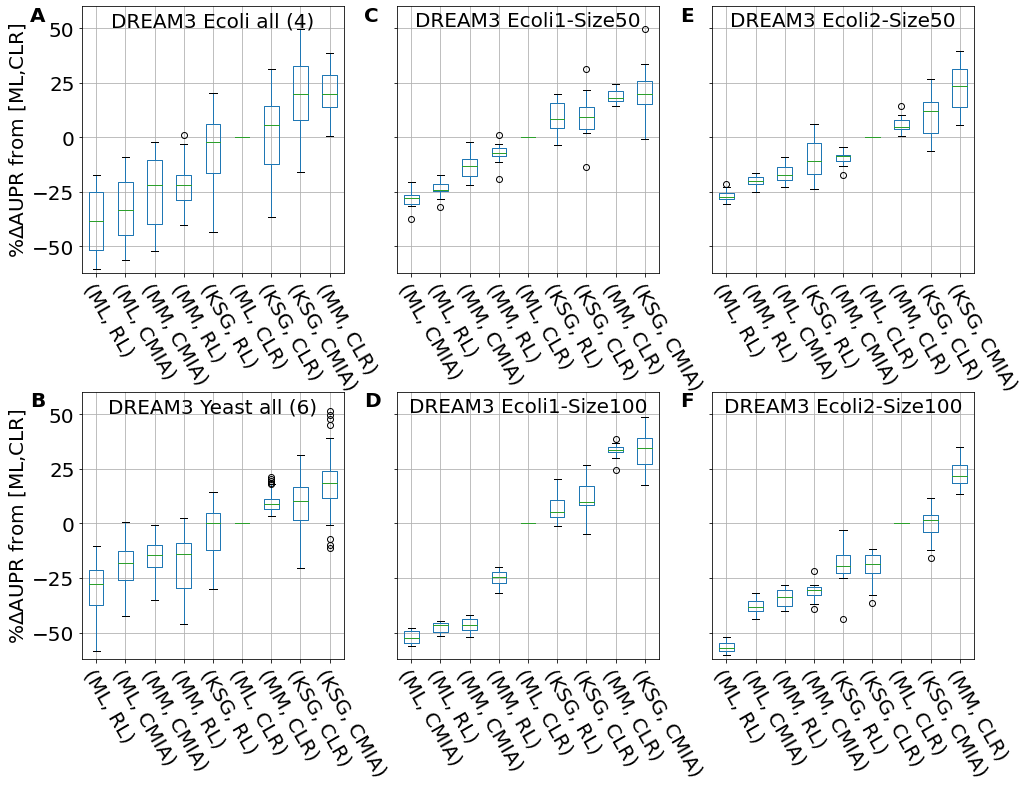

In [14]:
### 2021-10-12: Plotting the 4 Ecoli networks + 2 summary of Ecoli & Yeast
### 2021-12-08: Shiftting x-axis to the left

# Removing some MI estimators and Inference-algo
MI_list = ["ML","MM","KSG"]
Inference_list = ["RL","CLR","CMIA"]

### Plotting all 4 subplots in one figure
matplotlib.rcParams.update({"figure.figsize": (16,12)})

#Contants
# constants
label_rotation = -60 #-35
title_pad = -20
y_lim_high = 60 #95 #80
y_lim_low = -62 #-60

ax1 = plt.subplot(2,3,2)

rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Ecoli1") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()

ax1.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax1.set_ylim(y_lim_low, y_lim_high); 
ax1.set_ylabel(''); ax1.set_yticklabels([]); #ax1.set_yticks([]);
#ax1.set_xticks([]); ax1.set_xlabel('')
ax1.set_title("DREAM3 Ecoli1-Size50", y=1.0, pad=title_pad)
#ax1.tick_params(axis='x',labelrotation=label_rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

ax2 = plt.subplot(2,3,3)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Network Size']==50) & (df['Network Name']=="Ecoli2") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()
#rslt_df.boxplot(column=["AUPR"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax2.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax2.set_ylim(y_lim_low, y_lim_high); 
ax2.set_ylabel(''); ax2.set_yticklabels([]); #ax2.set_yticks([]);
ax2.set_title("DREAM3 Ecoli2-Size50", y=1.0, pad=title_pad)
#ax2.tick_params(axis='x',labelrotation=label_rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax2.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

ax3 = plt.subplot(2,3,5)

rslt_df = df[(df['Network Size']==100) & (df['Network Name']=="Ecoli1") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()

ax3.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax3.set_ylim(y_lim_low, y_lim_high); 
ax3.set_ylabel(''); ax3.set_yticklabels([]); #ax3.set_yticks([]);
#ax1.set_xticks([]); ax1.set_xlabel('')
ax3.set_title("DREAM3 Ecoli1-Size100", y=1.0, pad=title_pad)
#ax3.tick_params(axis='x',labelrotation=label_rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax3.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

ax4 = plt.subplot(2,3,6)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Network Size']==100) & (df['Network Name']=="Ecoli2") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()
#rslt_df.boxplot(column=["AUPR"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax4.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax4.set_ylim(y_lim_low, y_lim_high); 
ax4.set_ylabel(''); ax4.set_yticklabels([]); #ax4.set_yticks([]);
ax4.set_title("DREAM3 Ecoli2-Size100", y=1.0, pad=title_pad)
#ax4.tick_params(axis='x',labelrotation=label_rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax4.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

###############

ax5 = plt.subplot(2,3,1)

rslt_df = df[(df['Organism'] == "Ecoli") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot(rot=label_rotation)
#rslt_df.boxplot(column=["AUPR_relative"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)

ax5.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax5.set_ylim(y_lim_low, y_lim_high); 
#ax5.set_yticks([]); ax5.set_ylabel('')
#ax5.set_xticks([]); ax5.set_xlabel('')
ax5.set_title("DREAM3 Ecoli all (4)", y=1.0, pad=title_pad)
#ax5.tick_params(axis='x',labelrotation=rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax5.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

ax6 = plt.subplot(2,3,4)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Organism'] == "Yeast") & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot(rot=label_rotation)
#rslt_df.boxplot(column=["AUPR_relative"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax6.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax6.set_ylim(y_lim_low, y_lim_high); 
#ax6.set_ylabel(''); ax6.set_yticklabels([]); #ax6.set_yticks([]);
ax6.set_title("DREAM3 Yeast all (6)", y=1.0, pad=title_pad)
#ax6.tick_params(axis='x',labelrotation=rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax6.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

##############

plt.subplots_adjust(hspace=0.45) #left=None, bottom=None, right=None, top=None, wspace=None, hspace=None

plt.suptitle('')

plt.tight_layout

plt.figtext(0.08,0.88,"A", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.37,0.88,"C", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.645,0.88,"E", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.08,0.435,"B", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.37,0.435,"D", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.645,0.435,"F", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})

plt.savefig(os.path.join(path_to_figures, 'Figure5_DREAM3_deltaAUPR_organisms.pdf'), dpi=300, bbox_inches='tight')

In [15]:
### Adding DREAM 4

In [16]:
# Load data into a data frame so it is easier to group according to specific criteria
path_to_data = os.path.expanduser('../DATA/dream4/')
os.chdir(path_to_data)

inFiles = []
column_names = ['AUPR', 'Network Size', 'Network Name', 'Data Type', 'MI-est', 'Bins {k}', 'Inf-algo', 'Replicate']

# listing all in silico networks
topology_list = []

for topology in os.listdir():
    if os.path.isdir(topology) == True:
        topology_list.append(topology)

### Main part - iterating over all networks and all replicates
for topology in topology_list:   
    os.chdir(str('./'+topology))
    
    for replicate in os.listdir():
    
        if os.path.isdir(replicate) == True:
            os.chdir(str('./'+replicate))

            for file in os.listdir():
                if "AUPR" in file:
                    inFiles.append(os.path.abspath(file))

            os.chdir('../')  
    os.chdir('../')  
    
df_from_each_file = (pd.read_csv(f, comment='#', names=column_names) for f in inFiles)
df2   = pd.concat(df_from_each_file, ignore_index=True)

#df["Organism"] = df["Network Name"].str.slice(0, -1) # for DREAM 3 only
#df.replace({'Inf-algo' : { 'MI2_Zscore' : 'CLR_v1', 'MI2' : 'RL', 'CMIA_CLR' : 'CMIA_CLR'}}, inplace=True)
df2.replace({'Inf-algo' : { 'MI2_Zscore' : 'CLR_v1', 'MI2' : 'RL', 'CMIA_CLR' : 'CMIA', 'CLRvMinet' : 'CLRvMinet'}}, inplace=True)
df2.replace({'MI-est' : { 'Shannon' : 'ML', 'Miller-Madow' : 'MM'}}, inplace=True) 

# removing duplicates
df2.drop_duplicates(inplace = True)

print(df2.head(5))

    AUPR Network Size Network Name Data Type MI-est Bins {k}       Inf-algo  \
0  0.313           10            2        SS     MM        6      CLRvMinet   
1  0.366           10            2        SS     ML        6             RL   
2  0.342           10            2        SS     MM        6  CMIA_CLR_vKSG   
3  0.188           10            2        SS     ML        6         ARACNE   
4  0.366           10            2        SS     MM        6             RL   

  Replicate  
0     rep_8  
1     rep_8  
2     rep_8  
3     rep_8  
4     rep_8  


In [17]:
# backing up df2
df2_backup = df2.copy()
# Selecting k =3 and bins = floor(sqrt(data)) same as Minet
n1_g100_data_pts = 393
n2_g100_data_pts = 401
n3_g100_data_pts = 401
n4_g100_data_pts = 401
n5_g100_data_pts = 401

df2 = df2[~((df2['Bins {k}'] != 3) & (df2["MI-est"] == "KSG"))]  
df2 = df2[~((df2['Network Size']==100) & (df2["MI-est"] == "ML") & (df2["Network Name"] == 1) & (df2['Bins {k}'] != np.floor(n1_g100_data_pts**(1/2))))]  
df2 = df2[~((df2['Network Size']==100) & (df2["MI-est"] == "ML") & (df2["Network Name"] == 2) & (df2['Bins {k}'] != np.floor(n2_g100_data_pts**(1/2))))]
df2 = df2[~((df2['Network Size']==100) & (df2["MI-est"] == "ML") & (df2["Network Name"] == 3) & (df2['Bins {k}'] != np.floor(n3_g100_data_pts**(1/2))))]
df2 = df2[~((df2['Network Size']==100) & (df2["MI-est"] == "ML") & (df2["Network Name"] == 4) & (df2['Bins {k}'] != np.floor(n4_g100_data_pts**(1/2))))]
df2 = df2[~((df2['Network Size']==100) & (df2["MI-est"] == "ML") & (df2["Network Name"] == 5) & (df2['Bins {k}'] != np.floor(n5_g100_data_pts**(1/2))))]
df2 = df2[~(df2['Network Size']== 10)] # For DREAM3 no need for network size 10

# Removing some MI estimators and Inference-algo
MI_list = ["ML","KSG"]
Inference_list = ["RL","CLRvMinet","CMIA_CLR","CMIA_CLR_vKSG"]

# restoring df2 to origianl
#df2 = df2_backup.copy()

df2.groupby(["Network Size","Inf-algo","MI-est"]).count() #mean()

AUPR  Network Name  Data Type  Bins {k}  \
Network Size Inf-algo       MI-est                                            
100          ARACNE         KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
             CLRvMinet      KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
             CMIA_CLR_vKSG  KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
             CMI_CMI_pandas KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
             RL             KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   
             SA_CLR_v2      KL        50            50         50        50   
                            KSG       50            50         50        50   
                            ML        50            50         50        50   
                            MM        50            50         50        50   

                                    Replicate  
Network Size Inf-algo       MI-est             
100          ARACNE         KL             50  
                            KSG            50  
                            ML             50  
                            MM             50  
             CLRvMinet      KL             50  
                            KSG            50  
                            ML             50  
                            MM             50  
             CMIA_CLR_vKSG  KL             50  
                            KSG            50  
                            ML             50  
                            MM             50  
             CMI_CMI_pandas KL             50  
                            KSG            50  
                            ML             50  
                            MM             50  
             RL             KL             50  
                            KSG            50  
                            ML             50  
                            MM             50  
             SA_CLR_v2      KL             50  
                            KSG            50  
                            ML             50  
                            MM             50

In [18]:
# 2021-04-27: Adding AUPR improvement relative to [CLR, ML]
#df2["AUPR_relative"] = df2["AUPR"]-df2["AUPR"][]
#df2[(df2["Inf-algo"] == "CLR") & (df2["MI-est"] == "ML") & (df2["Network Size"] == 50) & (df2["Network Name"] == "Yeast2")]

for net_name in df2["Network Name"].unique():
    print(net_name)
    #rslt_df2 = df2[df2["Network Name"] == net_name]
    #for net_size in rslt_df2["Network Size"].unique():
    for net_size in df2["Network Size"].unique():
        print(net_size)
        #rslt_df2 = rslt_df2[rslt_df2["Network Size"] == net_size]
        #for rep in rslt_df2.Replicate.unique():
        for rep in df2.Replicate.unique():
            print(rep)
            #rslt_df2 = rslt_df2[rslt_df2["Replicate"] == rep]
            rslt_df2 = df2[(df2["Replicate"] == rep) & (df2["Network Size"] == net_size) & (df2["Network Name"] == net_name)]
            #print(df2[(df2["Inf-algo"] == "CLR") & (df2["MI-est"] == "ML") & (df2["Replicate"] == rep) & (df2["Network Size"] == net_size) & (df2["Network Name"] == net_name)].AUPR)
            #print(rslt_df2.AUPR - rslt_df2[(rslt_df2["Inf-algo"] == "CLR") & (rslt_df2["MI-est"] == "ML")].AUPR)
            AUPR_value_to_compare = float(rslt_df2[(rslt_df2["Inf-algo"] == "CLRvMinet") & (rslt_df2["MI-est"] == "ML")].AUPR)
            print((rslt_df2.AUPR - AUPR_value_to_compare)/AUPR_value_to_compare*100)
            df2.loc[rslt_df2.index, ('AUPR_relative')] = (rslt_df2.AUPR - AUPR_value_to_compare)/AUPR_value_to_compare*100

df2.replace({'Inf-algo' : { 'CMIA_CLR_vKSG' : 'CMIA', 'CLRvMinet' : 'CLR'}}, inplace=True)

df2['AUPR_relative'] = df2['AUPR_relative'].fillna(0)

3
100
rep_8
100      0.000000
119    -96.666667
120    -97.037037
121    -85.925926
134     20.000000
147    -97.407407
148     -0.370370
149    -24.074074
150    -68.518519
151    -29.259259
164     34.074074
167    -52.962963
168     32.592593
169    -42.592593
170    -87.777778
171     14.444444
172    -81.851852
173    -38.148148
192   -100.000000
193    -70.370370
194    -99.629630
195    -38.888889
196    -24.814815
197    -62.592593
Name: AUPR, dtype: float64
rep_4
198     0.000000
217   -95.833333
218   -98.263889
219   -86.805556
232    14.930556
245   -97.916667
246    -1.388889
247   -25.000000
248   -69.791667
249   -31.944444
262    30.902778
265   -50.347222
266    28.472222
267   -45.486111
268   -87.847222
269    11.111111
270   -87.152778
271   -41.666667
290   -99.652778
291   -70.833333
292   -99.652778
293   -41.666667
294   -29.513889
295   -67.013889
Name: AUPR, dtype: float64
rep_1
296      0.000000
315    -96.644295
316    -98.993289
317    -88.255034
330     19

3866    -55.000000
3867    -98.636364
3868    -64.090909
3876      9.090909
3879    -15.909091
3880    -49.545455
3881     12.272727
3882    -54.545455
3883     35.000000
3884    -88.636364
3885    -99.545455
3886      0.000000
3905    -88.181818
3906    -89.090909
3907    -60.454545
3908    -99.545455
3909    -26.363636
3910    -26.363636
3929   -100.000000
3957     26.818182
3960    -11.818182
3961    -58.636364
3962    -19.545455
3963    -98.636364
Name: AUPR, dtype: float64
rep_9
3964    -48.826291
3965    -98.122066
3966    -63.849765
3974      5.633803
3977    -19.248826
3978    -49.295775
3979     12.676056
3980    -65.258216
3981     29.577465
3982    -88.732394
3983    -99.530516
3984      0.000000
4003    -88.732394
4004    -88.262911
4005    -61.502347
4006    -99.530516
4007    -30.516432
4008    -28.638498
4027   -100.000000
4055     25.821596
4058    -12.206573
4059    -56.338028
4060    -21.596244
4061    -98.122066
Name: AUPR, dtype: float64
rep_6
4062    -49.122807
406

In [19]:
df2.groupby(["Network Size", "Inf-algo", "MI-est"]).median()  # mean()

AUPR  AUPR_relative
Network Size Inf-algo       MI-est                       
100          ARACNE         KL      0.0020     -99.058891
                            KSG     0.1290     -43.112245
                            ML      0.0800     -68.279754
                            MM      0.1030     -58.494243
             CLR            KL      0.0300     -87.902669
                            KSG     0.2600      17.767519
                            ML      0.2320       0.000000
                            MM      0.2615      15.453216
             CMIA           KL      0.0310     -87.328955
                            KSG     0.3020      33.581165
                            ML      0.1445     -40.069204
                            MM      0.1685     -30.485779
             CMI_CMI_pandas KL      0.0010     -99.445979
                            KSG     0.0860     -64.448785
                            ML      0.0010     -99.477803
                            MM      0.0020     -99.103849
             RL             KL      0.0020     -98.994132
                            KSG     0.2260     -10.013637
                            ML      0.1590     -38.735783
                            MM      0.1905     -23.974753
             SA_CLR_v2      KL      0.0310     -87.305616
                            KSG     0.3010      30.210671
                            ML      0.0760     -66.970999
                            MM      0.0820     -65.156580

In [20]:
"""
### Plotting 3 subplots in one figure
matplotlib.rcParams.update({"figure.figsize": (16,5)})

#Contants
MI_list = ["ML","KSG"]
Inference_list = ["RL","CLR","CMIA"]
title_pad = -20
rotation = -60
max_y = 0.435

ax1 = plt.subplot(1,3,1)

rslt_df = df[(df['Network Size']==50) & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df_tmp = pd.DataFrame({col:vals['AUPR'] for col,vals in grouped})

meds = df_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df_tmp = df_tmp[meds.index]
df_tmp.boxplot()

ax1.set_ylim(0, max_y); ax1.set_ylabel('AUPR')
#ax1.set_xticks([]); ax1.set_xlabel('')
ax1.set_title("DREAM3 Net Size 50", y=1.0, pad=title_pad)
ax1.tick_params(axis='x',labelrotation=rotation)

ax2 = plt.subplot(1,3,2)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Network Size']==100) & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df_tmp = pd.DataFrame({col:vals['AUPR'] for col,vals in grouped})

meds = df_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df_tmp = df_tmp[meds.index]
df_tmp.boxplot()
#rslt_df.boxplot(column=["AUPR"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax2.set_ylim(0, max_y); ax2.set_ylabel('AUPR')
ax2.set_ylabel(''); ax2.set_yticklabels([]); #ax2.set_yticks([]);
ax2.set_title("DREAM3 Net Size 100", y=1.0, pad=title_pad)
ax2.tick_params(axis='x',labelrotation=rotation)

ax3 = plt.subplot(1,3,3)

rslt_df = df2[(df2['Network Size']==100) & (df2["MI-est"].isin(MI_list)) & (df2["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df_tmp = pd.DataFrame({col:vals['AUPR'] for col,vals in grouped})

meds = df_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df_tmp = df_tmp[meds.index]
df_tmp.boxplot()

ax3.set_ylim(0, max_y); ax3.set_ylabel('AUPR')
ax3.set_ylabel(''); ax3.set_yticklabels([]); #ax2.set_yticks([]);
#ax1.set_xticks([]); ax1.set_xlabel('')
ax3.set_title("DREAM4 Net Size 100", y=1.0, pad=title_pad)
ax3.tick_params(axis='x',labelrotation=rotation)

plt.suptitle('')

plt.tight_layout

plt.figtext(0.075,0.91,"A", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.37,0.91,"B", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.645,0.91,"C", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})

plt.savefig(os.path.join(path_to_figures, 'Figure3_DREAM3and4_AUPR.pdf'), dpi=300, bbox_inches='tight')
"""

'\n### Plotting 3 subplots in one figure\nmatplotlib.rcParams.update({"figure.figsize": (16,5)})\n\n#Contants\nMI_list = ["ML","KSG"]\nInference_list = ["RL","CLR","CMIA"]\ntitle_pad = -20\nrotation = -60\nmax_y = 0.435\n\nax1 = plt.subplot(1,3,1)\n\nrslt_df = df[(df[\'Network Size\']==50) & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  \ngrouped = rslt_df.groupby(["MI-est", "Inf-algo"])\ndf_tmp = pd.DataFrame({col:vals[\'AUPR\'] for col,vals in grouped})\n\nmeds = df_tmp.median()\nmeds.sort_values(ascending=True, inplace=True)\ndf_tmp = df_tmp[meds.index]\ndf_tmp.boxplot()\n\nax1.set_ylim(0, max_y); ax1.set_ylabel(\'AUPR\')\n#ax1.set_xticks([]); ax1.set_xlabel(\'\')\nax1.set_title("DREAM3 Net Size 50", y=1.0, pad=title_pad)\nax1.tick_params(axis=\'x\',labelrotation=rotation)\n\nax2 = plt.subplot(1,3,2)\n# Removing some MI estimators and Inference-algo\nrslt_df = df[(df[\'Network Size\']==100) & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list

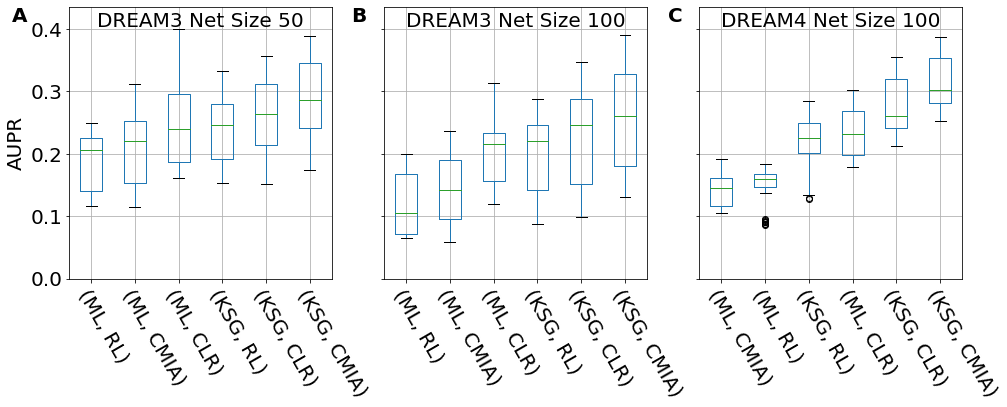

In [21]:
### Plotting 3 subplots in one figure
### 2021-12-08: shifting x-axis to the left and lowering plot labels
matplotlib.rcParams.update({"figure.figsize": (16,5)})

# Contants
MI_list = ["ML","KSG"]
Inference_list = ["RL","CLR","CMIA"]
title_pad = -20
rotation = -60
max_y = 0.435

ax1 = plt.subplot(1,3,1)

rslt_df = df[(df['Network Size']==50) & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df_tmp = pd.DataFrame({col:vals['AUPR'] for col,vals in grouped})

meds = df_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df_tmp = df_tmp[meds.index]
df_tmp.boxplot()

ax1.set_ylim(0, max_y); ax1.set_ylabel('AUPR')
#ax1.set_xticks([]); ax1.set_xlabel('')
ax1.set_title("DREAM3 Net Size 50", y=1.0, pad=title_pad)
#ax1.tick_params(axis='x',labelrotation=rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

ax2 = plt.subplot(1,3,2)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Network Size']==100) & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df_tmp = pd.DataFrame({col:vals['AUPR'] for col,vals in grouped})

meds = df_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df_tmp = df_tmp[meds.index]
df_tmp.boxplot()
#rslt_df.boxplot(column=["AUPR"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax2.set_ylim(0, max_y); ax2.set_ylabel('AUPR')
ax2.set_ylabel(''); ax2.set_yticklabels([]); #ax2.set_yticks([]);
ax2.set_title("DREAM3 Net Size 100", y=1.0, pad=title_pad)
#ax2.tick_params(axis='x',labelrotation=rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax2.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

ax3 = plt.subplot(1,3,3)

rslt_df = df2[(df2['Network Size']==100) & (df2["MI-est"].isin(MI_list)) & (df2["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df_tmp = pd.DataFrame({col:vals['AUPR'] for col,vals in grouped})

meds = df_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df_tmp = df_tmp[meds.index]
df_tmp.boxplot()

ax3.set_ylim(0, max_y); ax3.set_ylabel('AUPR')
ax3.set_ylabel(''); ax3.set_yticklabels([]); #ax2.set_yticks([]);
#ax1.set_xticks([]); ax1.set_xlabel('')
ax3.set_title("DREAM4 Net Size 100", y=1.0, pad=title_pad)
#ax3.tick_params(axis='x',labelrotation=rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax3.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

plt.suptitle('')

plt.tight_layout

plt.figtext(0.075,0.88,"A", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.37,0.88,"B", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.645,0.88,"C", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})

plt.savefig(os.path.join(path_to_figures, 'Figure3_DREAM3and4_AUPR.pdf'), dpi=300, bbox_inches='tight')

In [22]:
"""
### Plotting 3 subplots in one figure
matplotlib.rcParams.update({"figure.figsize": (16,5)})

#Contants
MI_list = ["ML","MM","KSG"]
Inference_list = ["RL","CLR","CMIA"]
title_pad = -20
label_rotation = -60 #-35
y_lim_high = 60 #95 #80
y_lim_low = -62 #-60

ax4 = plt.subplot(1,3,1)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Network Size']==50) & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot(rot=label_rotation)
#rslt_df.boxplot(column=["AUPR_relative"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)

ax4.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax4.set_ylim(y_lim_low, y_lim_high); 
#ax1.set_xticks([]); ax1.set_xlabel('')
ax4.set_title("DREAM3 Net Size 50", y=1.0, pad=title_pad)

ax5 = plt.subplot(1,3,2)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Network Size']==100) & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot(rot=label_rotation)
#rslt_df.boxplot(column=["AUPR_relative"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax5.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax5.set_ylim(y_lim_low, y_lim_high); 
ax5.set_ylabel(''); ax5.set_yticklabels([]); #ax5.set_yticks([]);
ax5.set_title("DREAM3 Net Size 100", y=1.0, pad=title_pad)
#ax5.tick_params(axis='x',labelrotation=rotation)
###############

ax6 = plt.subplot(1,3,3)

rslt_df = df2[(df2['Network Size']==100) & (df2["MI-est"].isin(MI_list)) & (df2["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot(rot=label_rotation)
#rslt_df.boxplot(column=["AUPR_relative"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)

ax6.set_ylabel(r'%$\Delta$AUPR from [CLR,ML]'); ax6.set_ylim(y_lim_low, y_lim_high); 
ax6.set_ylabel(''); ax6.set_yticklabels([]); #ax6.set_yticks([]);
ax6.set_title("DREAM4 Net Size 100", y=1.0, pad=title_pad)
#ax6.tick_params(axis='x',labelrotation=rotation)

plt.suptitle('')

plt.tight_layout

plt.figtext(0.075,0.91,"A", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.37,0.91,"B", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.645,0.91,"C", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})

plt.savefig(os.path.join(path_to_figures, 'Figure4_DREAM3and4_deltaAUPR.pdf'), dpi=300, bbox_inches='tight')
"""

'\n### Plotting 3 subplots in one figure\nmatplotlib.rcParams.update({"figure.figsize": (16,5)})\n\n#Contants\nMI_list = ["ML","MM","KSG"]\nInference_list = ["RL","CLR","CMIA"]\ntitle_pad = -20\nlabel_rotation = -60 #-35\ny_lim_high = 60 #95 #80\ny_lim_low = -62 #-60\n\nax4 = plt.subplot(1,3,1)\n# Removing some MI estimators and Inference-algo\nrslt_df = df[(df[\'Network Size\']==50) & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  \ngrouped = rslt_df.groupby(["MI-est", "Inf-algo"])\ndf2_tmp = pd.DataFrame({col:vals[\'AUPR_relative\'] for col,vals in grouped})\n\nmeds = df2_tmp.median()\nmeds.sort_values(ascending=True, inplace=True)\ndf2_tmp = df2_tmp[meds.index]\ndf2_tmp.boxplot(rot=label_rotation)\n#rslt_df.boxplot(column=["AUPR_relative"],by=["Inf-algo","MI-est"], rot=90, return_type=\'axes\', ax=ax1)#, showmeans=True, meanline=False)\n\nax4.set_ylabel(r\'%$\\Delta$AUPR from [ML,CLR]\'); ax4.set_ylim(y_lim_low, y_lim_high); \n#ax1.set_xticks([]); ax1.set_xla

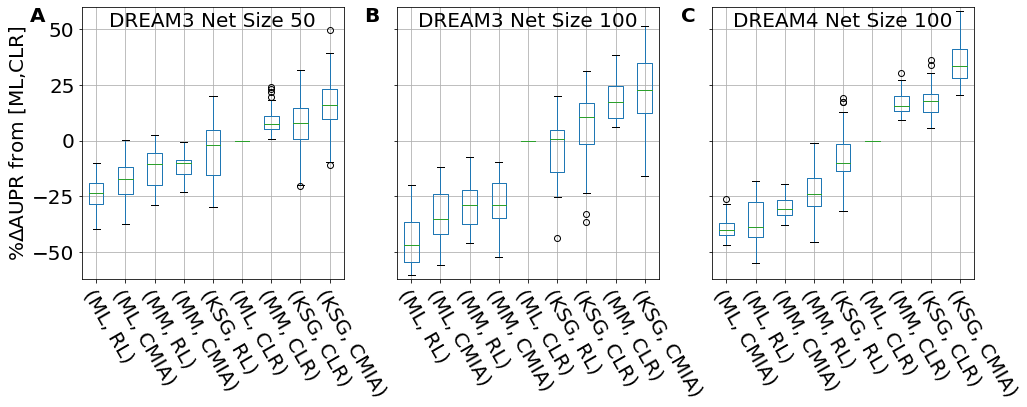

In [23]:
### Plotting 6 subplots in one figure
matplotlib.rcParams.update({"figure.figsize": (16,5)})

# Contants
MI_list = ["ML","MM","KSG"]
Inference_list = ["RL","CLR","CMIA"]
title_pad = -20
label_rotation = -60 #-35
y_lim_high = 60 #95 #80
y_lim_low = -62 #-60

ax4 = plt.subplot(1,3,1)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Network Size']==50) & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot(rot=label_rotation)
#rslt_df.boxplot(column=["AUPR_relative"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)

ax4.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax4.set_ylim(y_lim_low, y_lim_high); 
#ax1.set_xticks([]); ax1.set_xlabel('')
ax4.set_title("DREAM3 Net Size 50", y=1.0, pad=title_pad)
# rotates labels and aligns them horizontally to left 
plt.setp( ax4.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

ax5 = plt.subplot(1,3,2)
# Removing some MI estimators and Inference-algo
rslt_df = df[(df['Network Size']==100) & (df["MI-est"].isin(MI_list)) & (df["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot(rot=label_rotation)
#rslt_df.boxplot(column=["AUPR_relative"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax5.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]'); ax5.set_ylim(y_lim_low, y_lim_high); 
ax5.set_ylabel(''); ax5.set_yticklabels([]); #ax5.set_yticks([]);
ax5.set_title("DREAM3 Net Size 100", y=1.0, pad=title_pad)
#ax5.tick_params(axis='x',labelrotation=rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax5.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

###############

ax6 = plt.subplot(1,3,3)

rslt_df = df2[(df2['Network Size']==100) & (df2["MI-est"].isin(MI_list)) & (df2["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot(rot=label_rotation)
#rslt_df.boxplot(column=["AUPR_relative"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax1)#, showmeans=True, meanline=False)

ax6.set_ylabel(r'%$\Delta$AUPR from [CLR,ML]'); ax6.set_ylim(y_lim_low, y_lim_high); 
ax6.set_ylabel(''); ax6.set_yticklabels([]); #ax6.set_yticks([]);
ax6.set_title("DREAM4 Net Size 100", y=1.0, pad=title_pad)
#ax6.tick_params(axis='x',labelrotation=rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax6.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

plt.suptitle('')

plt.tight_layout

plt.figtext(0.08,0.88,"A", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.37,0.88,"B", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})
plt.figtext(0.645,0.88,"C", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'})

plt.savefig(os.path.join(path_to_figures, 'Figure4_DREAM3and4_deltaAUPR.pdf'), dpi=300, bbox_inches='tight')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

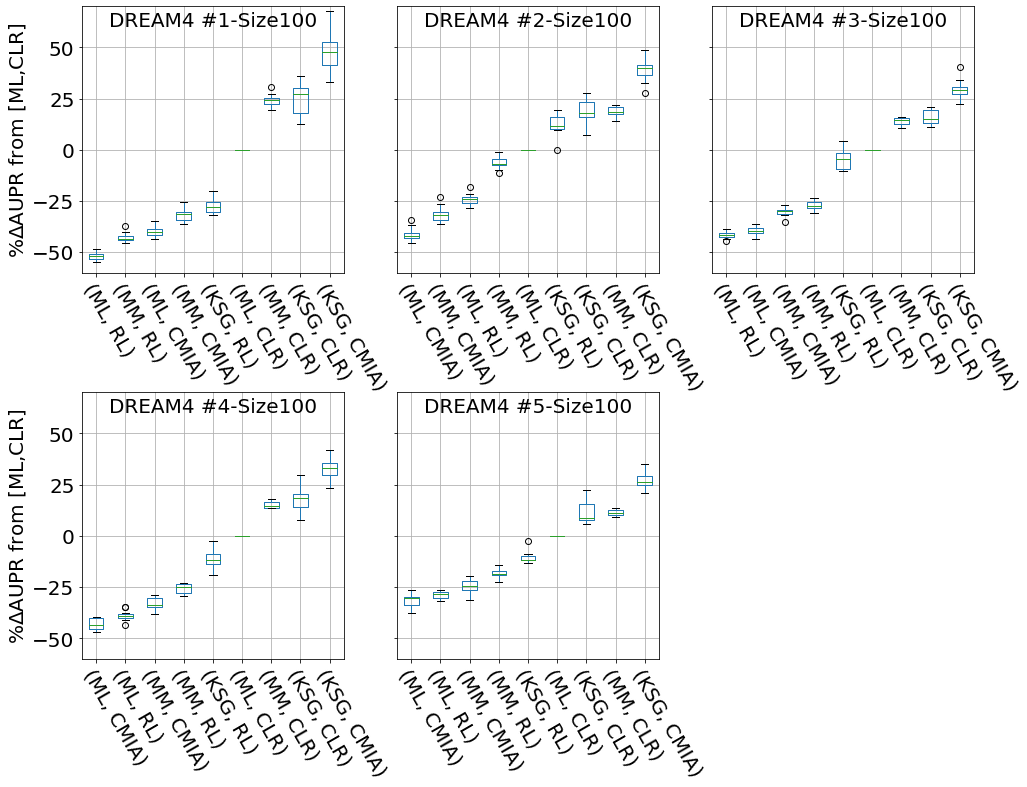

In [24]:
### 2021-10-02: Plotting the 5 networks from DREAM4
### 2021-12-08: shiftting the x-axis labels to the left

# Removing some MI estimators and Inference-algo
MI_list = ["ML","MM","KSG"]
Inference_list = ["RL","CLR","CMIA"]

### Plotting all 4 subplots in one figure
matplotlib.rcParams.update({"figure.figsize": (16,12)})

# Contants
title_pad = -20
rotation = -60
y_lim_high = 70 #80
y_lim_low = -60 #-60

ax1 = plt.subplot(2,3,1)

rslt_df2 = df2[(df2['Network Name']==1) & (df2["MI-est"].isin(MI_list)) & (df2["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df2.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()

ax1.set_ylim(y_lim_low, y_lim_high); ax1.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]')
#ax1.set_xticks([]); ax1.set_xlabel('')
ax1.set_title("DREAM4 #1-Size100", y=1.0, pad=title_pad)
#ax1.tick_params(axis='x',labelrotation=rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

ax2 = plt.subplot(2,3,2)
# Removing some MI estimators and Inference-algo
rslt_df2 = df2[(df2['Network Name']==2) & (df2["MI-est"].isin(MI_list)) & (df2["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df2.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()
#rslt_df2.boxplot(column=["AUPR"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax2.set_ylim(y_lim_low, y_lim_high); ax2.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]')
ax2.set_ylabel(''); ax2.set_yticklabels([]); #ax2.set_yticks([]);
ax2.set_title("DREAM4 #2-Size100", y=1.0, pad=title_pad)
#ax2.tick_params(axis='x',labelrotation=rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax2.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

ax3 = plt.subplot(2,3,3)

rslt_df2 = df2[(df2['Network Name']==3) & (df2["MI-est"].isin(MI_list)) & (df2["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df2.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()

ax3.set_ylim(y_lim_low, y_lim_high); ax3.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]')
ax3.set_ylabel(''); ax3.set_yticklabels([]); #ax3.set_yticks([]);
#ax1.set_xticks([]); ax1.set_xlabel('')
ax3.set_title("DREAM4 #3-Size100", y=1.0, pad=title_pad)
#ax3.tick_params(axis='x',labelrotation=rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax3.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

ax4 = plt.subplot(2,3,4)
# Removing some MI estimators and Inference-algo
rslt_df2 = df2[(df2['Network Name']==4) & (df2["MI-est"].isin(MI_list)) & (df2["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df2.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()
#rslt_df2.boxplot(column=["AUPR"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax4.set_ylim(y_lim_low, y_lim_high); ax4.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]')
#ax4.set_ylabel(''); ax4.set_yticklabels([]); #ax4.set_yticks([]);
ax4.set_title("DREAM4 #4-Size100", y=1.0, pad=title_pad)
#ax4.tick_params(axis='x',labelrotation=rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax4.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

ax5 = plt.subplot(2,3,5)
# Removing some MI estimators and Inference-algo
rslt_df2 = df2[(df2['Network Name']==5) & (df2["MI-est"].isin(MI_list)) & (df2["Inf-algo"].isin(Inference_list))]  
grouped = rslt_df2.groupby(["MI-est", "Inf-algo"])
df2_tmp = pd.DataFrame({col:vals['AUPR_relative'] for col,vals in grouped})

meds = df2_tmp.median()
meds.sort_values(ascending=True, inplace=True)
df2_tmp = df2_tmp[meds.index]
df2_tmp.boxplot()
#rslt_df2.boxplot(column=["AUPR"],by=["Inf-algo","MI-est"], rot=90, return_type='axes', ax=ax2)#, showmeans=True, meanline=False)

ax5.set_ylim(y_lim_low, y_lim_high); ax5.set_ylabel(r'%$\Delta$AUPR from [ML,CLR]')
ax5.set_ylabel(''); ax5.set_yticklabels([]); #ax5.set_yticks([]);
ax5.set_title("DREAM4 #5-Size100", y=1.0, pad=title_pad)
#ax5.tick_params(axis='x',labelrotation=rotation)
# rotates labels and aligns them horizontally to left 
plt.setp( ax5.xaxis.get_majorticklabels(), rotation=label_rotation, ha="left", rotation_mode="anchor")

plt.subplots_adjust(hspace=0.45) #left=None, bottom=None, right=None, top=None, wspace=None, hspace=None

plt.suptitle('')

plt.tight_layout

### Generating table S1 - median AUPR and AUPR_difference for all networks

In [26]:
df["Data set"] = "DREAM3"
df2["Data set"] = "DREAM4"

df_full = pd.concat([df,df2], ignore_index=True)

df_full.replace({'Inf-algo' : { 'SA_CLR_v2' : 'SA_CLR', 'CMI_CMI' : 'CMI2rt'}}, inplace=True)

#df_full.groupby(["Data set","Network Size","Inf-algo","MI-est"]).median() #mean()
df_full_median = df_full.groupby(["Data set", "Network Size", "Inf-algo", "MI-est"]).median().reset_index()

### save dataframe to file
output_filename = "Table_S1_median.csv"
df_full_median.to_csv(os.path.join(path_to_figures, output_filename), columns = ["Data set", "Network Size", "Inf-algo", "MI-est", "AUPR", "AUPR_relative"], header = ["#Data set", "Network Size", "Inf-algo", "MI-est", "median_AUPR", "AUPR_relative"], index=False)

df_full_mean = df_full.groupby(["Data set", "Network Size", "Inf-algo", "MI-est"]).mean().reset_index()

### save dataframe to file
output_filename = "Table_S1_mean.csv"
df_full_mean.to_csv(os.path.join(path_to_figures, output_filename), columns = ["Data set", "Network Size", "Inf-algo", "MI-est", "AUPR", "AUPR_relative"], header = ["#Data set", "Network Size", "Inf-algo", "MI-est", "mean_AUPR", "AUPR_relative"], index=False)

In [27]:
df_full_organism = df_full.groupby(["Organism", "Inf-algo", "MI-est"]).median().reset_index()

### save dataframe to file
output_filename = "Table_S2_organism.csv"
df_full_organism.to_csv(os.path.join(path_to_figures, output_filename), columns = ["Organism", "Inf-algo", "MI-est", "AUPR", "AUPR_relative"], header = ["#Organism", "Inf-algo", "MI-est", "median_AUPR", "AUPR_relative"], index=False)
